In [1]:
import numpy as np
import os

In [2]:
!pip install opencv-contrib-python==4.4.0.44
import cv2 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55.7 MB 1.2 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [3]:
# Create detector to compute SIFT
sift = cv2.SIFT_create()

In [4]:
queryImage_path = "/content/Modelo.png"
trainImage_path = "/content/t7.png"
prefix = "t7"

queryImage = cv2.imread(queryImage_path, cv2.IMREAD_COLOR)
trainImage = cv2.imread(trainImage_path, cv2.IMREAD_COLOR)

In [5]:
queryImage_keypoints = sift.detect(queryImage,None)
trainImage_keypoints = sift.detect(trainImage, None)

In [6]:
queryImage_keypoints, queryImage_descriptors = sift.compute(queryImage, queryImage_keypoints)
trainImage_keypoints, trainImage_descriptors = sift.compute(trainImage, trainImage_keypoints)

In [7]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(queryImage_descriptors, trainImage_descriptors)

In [8]:
print("Number of Keypoints in query Image: ", len(queryImage_keypoints))
print("Number of Keypoints in training Image: ", len(trainImage_keypoints))
print("Number of Matching Keypoints Between The Training and Query Images: ", len(matches))

Number of Keypoints in query Image:  482
Number of Keypoints in training Image:  349
Number of Matching Keypoints Between The Training and Query Images:  167


In [9]:
import random
# get three random match indices which are not the same
match_index_a = random.randint(0, len(matches) - 1)
match_index_b = random.randint(0, len(matches) - 1)
match_index_c = random.randint(0, len(matches) - 1)

In [10]:
# get Keypoints from match indices
# queryImage- keypoints
queryImage_keypoint_a = queryImage_keypoints[matches[match_index_a].queryIdx]
queryImage_keypoint_b = queryImage_keypoints[matches[match_index_b].queryIdx]
queryImage_keypoint_c = queryImage_keypoints[matches[match_index_c].queryIdx]

# trainImage-keypoints
trainImage_keypoint_a = trainImage_keypoints[matches[match_index_a].trainIdx]
trainImage_keypoint_b = trainImage_keypoints[matches[match_index_b].trainIdx]
trainImage_keypoint_c = trainImage_keypoints[matches[match_index_c].trainIdx]

In [11]:
# get affine transformation matrix from these 6 keypoints
trainImage_points = np.float32([[trainImage_keypoint_a.pt[0], trainImage_keypoint_a.pt[1]],
                                [trainImage_keypoint_b.pt[0], trainImage_keypoint_b.pt[1]],
                                [trainImage_keypoint_c.pt[0], trainImage_keypoint_c.pt[1]]])

queryImage_points = np.float32([[queryImage_keypoint_a.pt[0], queryImage_keypoint_a.pt[1]],
                                [queryImage_keypoint_b.pt[0], queryImage_keypoint_b.pt[1]],
                                [queryImage_keypoint_c.pt[0], queryImage_keypoint_c.pt[1]]])

In [12]:
# get transformation matrix for current points
currentMatrix = cv2.getAffineTransform(queryImage_points, trainImage_points)

In [13]:
print('Affine transformation')
currentMatrix

Affine transformation


array([[   1.27800901,    0.85900475, -211.61436094],
       [  -0.22404731,    0.40768215,  125.16723116]])

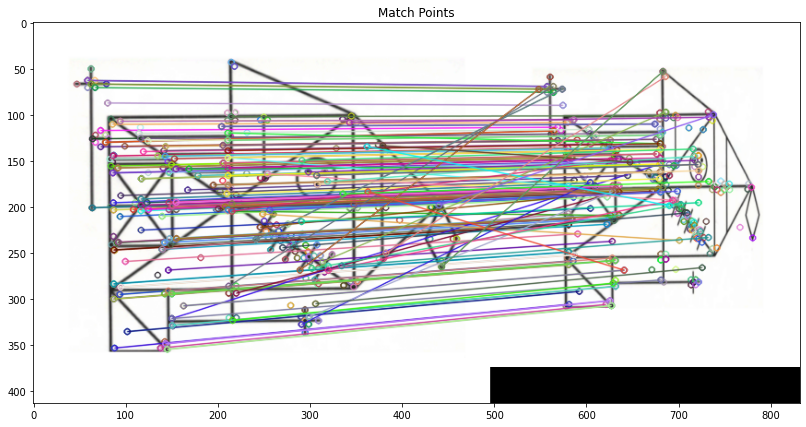

True

In [14]:
result = cv2.drawMatches(queryImage, queryImage_keypoints, trainImage, trainImage_keypoints, 
                         matches, trainImage, flags = 0)

import matplotlib.pyplot as plt
%matplotlib inline

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Match Points')
plt.imshow(result)
plt.show()

cv2.imwrite(prefix + '_matches_points.png',result)